# Assignment 7 (scipy)
#### 53 points

In this assignment
, we will process seismic data using Python's fft package

Due: April 21, 11:59 pm

The following code defines a seismogram class, with an initialization function included. This initialization function takes a filename as input, then read the file and store important information. The information we need in this exercise is 
- the time step "self.ts", which is related to the frequency of the seismogram
- the time series 'self.t', 
- the amplitude data 'self.data'

In [13]:
#define a class object name seismogram
class seismogram:
#the initial function will read the seismic data and save important information to attributes
    def __init__(self,filename):
        self.filename=filename
        fp=open(self.filename,"r")
        lines=fp.readlines()
        fp.close()     
        temp=lines[0].split()
        self.ts=float(temp[0])
        f=float(temp[0])
        temp=lines[6].split()
        self.lat=float(temp[1])
        self.lon=float(temp[2])
        temp=lines[10].split()
        self.distance=float(temp[3])
        temp=lines[14].split()
        self.year=int(temp[0])
        self.day=int(temp[1])
        self.starttime=int(temp[2])*3600+int(temp[3])*60+int(temp[4])
        temp=lines[22].split()
        self.staname=temp[0]
        data=[]
        t=[]
        j=0
        for line in lines[30:]:
            temp=line.split()
            for i in temp:
                data.append(float(i))
                t.append(j)
                j=j+f
        self.data=np.array(data)
        self.t=np.array(t)

    def filter(self, lb, hb):
        fft = fftpack.fft(self.data)
        sample_freq = fftpack.fftfreq(self.data.size, d=self.ts)
        mid_freq_fft = fft.copy()
        mid_freq_fft[np.abs(sample_freq) < lb] = 0
        mid_freq_fft[np.abs(sample_freq) > hb] = 0
        filtered_sig = fftpack.ifft(mid_freq_fft)
        plt.plot(self.t, filtered_sig)
        plt.ylabel('Amplitude')
        plt.xlabel('Time [s]')
        plt.show()
        

# 1. Read the following seismogram file using the 'seismogram' class
"./data/earthquakes/028.TIXI.dat"

In [14]:
import numpy as np
import matplotlib.pyplot as plt
sta=seismogram('028.TIXI.dat')

# 2. Plot the seismogram
2 points

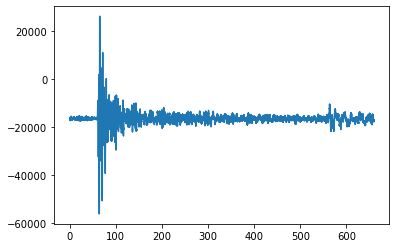

In [15]:
plt.plot(sta.t, sta.data)
plt.show()

# 3. Import fftpack from scipy module

2 points

In [16]:
from scipy import fftpack

# 4. Use the function of 'fft' in 'fftpack' to perform fast fourier transformation on the seismogram

2 points

In [17]:
sta_fft = fftpack.fft(sta.data)

# 5. Calculate the power or magnitude of the fft signal

2 points

In [18]:
power_fft = np.abs(sta_fft)

# 6. Find the corresponding frequency of the signal 

5 points

- use the time step information defined in the 'seismogram' class
- use the fftfreq function

In [19]:
sample_freq = fftpack.fftfreq(sta.data.size, d=sta.ts)

# 7. Plot the FFT power

5 points

- crop the figure in the x range of (0,10) and y range of (0,2e6)

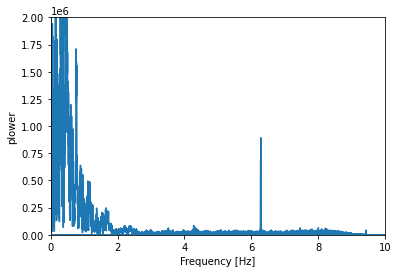

In [20]:
plt.plot(sample_freq, power_fft)
plt.xlim([0, 10])
plt.ylim([0, 2000000])
plt.ylabel('plower')
plt.xlabel('Frequency [Hz]')
plt.show()

# 8. Remove high frequency (>0.05) and low frequency (<0.04) from the spectrum, and transform the signal back to time domain from frequency domain

10 points

- This means that you are filtering the data in the frequency range of 0.04-0.05Hz, or period range of 20s-25s.

In [21]:
mid_freq_fft = sta_fft.copy()
mid_freq_fft[np.abs(sample_freq) < 0.04] = 0
mid_freq_fft[np.abs(sample_freq) > 0.05] = 0
filtered_sig = fftpack.ifft(mid_freq_fft)

# 9. Make a plot of the new signal with high frequency removed.

5 points

C:\Users\manna\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


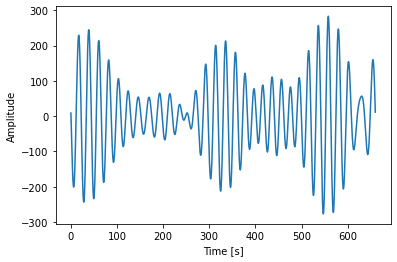

In [22]:
plt.plot(sta.t, filtered_sig)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.show()

# 10. Add a function named 'filter' function in the 'seismogram' class to use fft to filter seismograms.

15 points

- The filter function needs two inputs: the lower bound and upper bound of the frequency. Of course, you will need to add 'self' to the input arguments as well.
- Also make a plot of the filtered signal in this function
- try this function by running the code below to filter the seismogram in a frequency range of 0.04 to 0.05 Hz.

C:\Users\manna\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


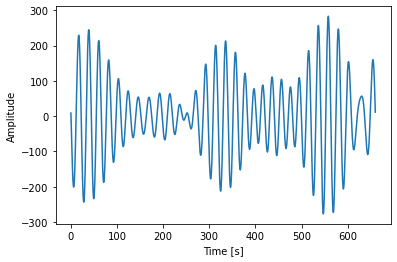

In [23]:
sta.filter(0.04,0.05)

# 11. filter the seismogram in the frequency range of 0.01 to 0.02
5 points

C:\Users\manna\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


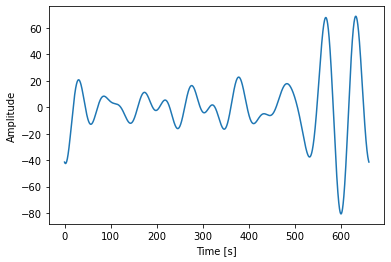

In [24]:
sta.filter(0.01,0.02)